## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = pd.DataFrame(boston)
X= boston.drop(columns='medv')
y = pd.DataFrame(boston, columns = ['medv'])

In [3]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### A variável "RM" tem mais correlação com a variavel "medv"

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [7]:
arvore1=DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, random_state=100)
arvore1=arvore1.fit(x_train,y_train)
arvore2=DecisionTreeRegressor(max_depth=2,min_samples_leaf=1, random_state=100)
arvore2=arvore2.fit(x_train,y_train)


In [8]:
R1=arvore1.score(X,y)
R2=arvore2.score(X,y)
MSE1=mean_squared_error(y_test,arvore1.predict(x_test))
MSE2=mean_squared_error(y_test,arvore2.predict(x_test))
print(f" R1= {R1}")
print(f" R2= {R2}")
print(f" MSE1= {MSE1}")
print(f" MSE2= {MSE2}")

 R1= 0.8978610591731854
 R2= 0.6850333959214452
 MSE1= 26.951120230571018
 MSE2= 39.32956119584


In [9]:
### Melhor àrvore com profundidade 10 (arvore 1)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [13]:
path=arvore1.cost_complexity_pruning_path(x_train,y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.28459704e-15, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.88323917e-05,
        4.23728814e-05, 5.64971751e-05, 5.64971751e-05, 5.64971751e-05,
        6.35593220e-05, 7.53295669e-05, 7.53295669e-05, 1.17702448e-04,
        1.17702448e-04, 1.17702448e-04, 1.27118644e-04, 1.27118644e-04,
        1.27118644e-04, 1.27118644e-04, 1.27118644e-04, 1.69491525e-04,
        1.69491525e-04, 2.25988701e-04, 2.25988701e-04, 2.30696798e-04,
        3.01318267e-04, 3.53107345e-04, 3.53107345e-04, 3.53107345e-04,
        3.81355932e-04, 3.81355932e-04, 4.61393597e-04, 5.08474576e-04,
        5.08474576e-04, 6.77966102e-04, 6.77966102e-04, 6.80320151e-04,
        6.92090395e-04, 6.92090395e-04, 6.92090395e-04, 6.92090395e-04,
        6.92090395e-04, 7.62711864e-04, 7.62711864e-04, 7.95668550e-04,
        7.95668550e-04, 1.13935970e-03, 1.13935970

In [161]:
ccp_alphas, impurities=path.ccp_alphas, path.impurities
ccp_alphas, impurities

(array([0.00000000e+00, 1.28459704e-15, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.41242938e-05,
        1.41242938e-05, 1.41242938e-05, 1.41242938e-05, 1.88323917e-05,
        4.23728814e-05, 5.64971751e-05, 5.64971751e-05, 5.64971751e-05,
        6.35593220e-05, 7.53295669e-05, 7.53295669e-05, 1.17702448e-04,
        1.17702448e-04, 1.17702448e-04, 1.27118644e-04, 1.27118644e-04,
        1.27118644e-04, 1.27118644e-04, 1.27118644e-04, 1.69491525e-04,
        1.69491525e-04, 2.25988701e-04, 2.25988701e-04, 2.30696798e-04,
        3.01318267e-04, 3.53107345e-04, 3.53107345e-04, 3.53107345e-04,
        3.81355932e-04, 3.81355932e-04, 4.61393597e-04, 5.08474576e-04,
        5.08474576e-04, 6.77966102e-04, 6.77966102e-04, 6.80320151e-04,
        6.92090395e-04, 6.92090395e-04, 6.92090395e-04, 6.92090395e-04,
        6.92090395e-04, 7.62711864e-04, 7.62711864e-04, 7.95668550e-04,
        7.95668550e-04, 1.13935970e-03, 1.13935970e-03, 1.355932

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [160]:
arvores=[]

for ccp_alpha in ccp_alphas:
    arv=DecisionTreeRegressor( random_state=100, ccp_alpha=ccp_alpha)
    arv.fit(x_train,y_train)
    arvores.append(arv)
    print(arv)

DecisionTreeRegressor(random_state=100)
DecisionTreeRegressor(ccp_alpha=1.284597036402441e-15, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.4124293784976739e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.4124293785297888e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.4124293785297888e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.4124293785378175e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.4124293785619037e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.4124293785619037e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.4124293785619037e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.4124293786582485e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.4124293786903634e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=1.8832391713971378e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=4.2372881356535965e-05, random_state=100)
DecisionTreeRegressor(ccp_alpha=5.649717514119155e-05, random_state=100)


DecisionTreeRegressor(ccp_alpha=0.019096045197740087, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.021696428571430126, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.023531073446318565, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.023757062146894815, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.023826562640111543, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.024406779661017997, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.026450094161959564, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.026576271186440553, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.027150928167872526, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.027193973634651578, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.027800847457634812, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.0292658730158729, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.030779302304730825, random_state=100)
DecisionTreeRegressor(ccp_alpha=0.030889830508475866, random_state

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [74]:
mses=[]
predicao= arv.predict(x_train)
for arvore in arvores:
    mse=[mean_squared_error(y_train,arvore.predict(x_train)) ]
    mses.append(mse)

print(mses)

[[0.0], [0.0], [7.062146892655367e-05], [0.00018361581920903823], [0.00018361581920903823], [0.0002118644067796595], [0.0002966101694915248], [0.0002966101694915248], [0.0002966101694915248], [0.0003389830508474572], [0.00035310734463276836], [0.0004096045197740123], [0.00047080979284369286], [0.0008521657250470815], [0.0008521657250470815], [0.0009651600753295665], [0.0012476459510357837], [0.0013865348399246704], [0.0015371939736346506], [0.0018855932203389822], [0.002238700564971752], [0.002356403013182675], [0.002356403013182675], [0.0031191148775894482], [0.0036275894538606336], [0.0036275894538606336], [0.0037547080979284304], [0.00422080979284368], [0.00422080979284368], [0.004842278719397358], [0.0050682674199623275], [0.005529661016949146], [0.00634651600753295], [0.007391713747645946], [0.008097928436911483], [0.008097928436911483], [0.010253295668549899], [0.01063465160075329], [0.01063465160075329], [0.012075329566854986], [0.013092278719397362], [0.01369491525423729], [0.0

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

0.0 [0.0]


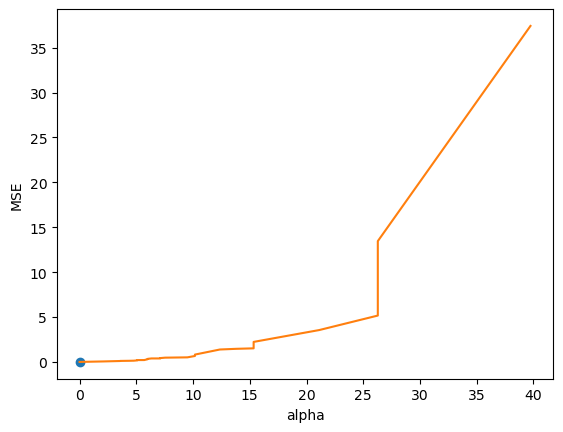

In [158]:
fig,ax=plt.subplots()
alpha=path.ccp_alphas
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.plot(min(mses), ccp_alphas[0], marker='o')

plt.plot(mses, alpha)
print(ccp_alphas[0],min(mses))

### O ponto mínimo de MSE é 0 e o ponto alpha mais proximo é 0.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [120]:
r2=arvores[0].score(x_train,y_train)
r2

1.0

### 7. Visualize esta árvore.

CPU times: total: 0 ns
Wall time: 0 ns


[Text(0.7003797568887106, 0.9791666666666666, 'x[5] <= 6.945\nsquared_error = 77.162\nsamples = 354\nvalue = 22.602'),
 Text(0.4674507033618691, 0.9375, 'x[12] <= 14.75\nsquared_error = 33.675\nsamples = 298\nvalue = 19.95'),
 Text(0.27889106251114676, 0.8958333333333334, 'x[5] <= 6.552\nsquared_error = 18.296\nsamples = 187\nvalue = 23.03'),
 Text(0.1452620608168361, 0.8541666666666666, 'x[12] <= 7.57\nsquared_error = 8.746\nsamples = 149\nvalue = 21.721'),
 Text(0.04779739611200285, 0.8125, 'x[11] <= 393.285\nsquared_error = 3.27\nsamples = 33\nvalue = 24.073'),
 Text(0.027822364901016586, 0.7708333333333334, 'x[9] <= 548.0\nsquared_error = 2.327\nsamples = 19\nvalue = 23.337'),
 Text(0.024968789013732832, 0.7291666666666666, 'x[10] <= 19.95\nsquared_error = 1.439\nsamples = 18\nvalue = 23.106'),
 Text(0.0149812734082397, 0.6875, 'x[2] <= 4.895\nsquared_error = 0.757\nsamples = 14\nvalue = 23.521'),
 Text(0.009274121633672196, 0.6458333333333334, 'x[11] <= 392.66\nsquared_error = 0.2

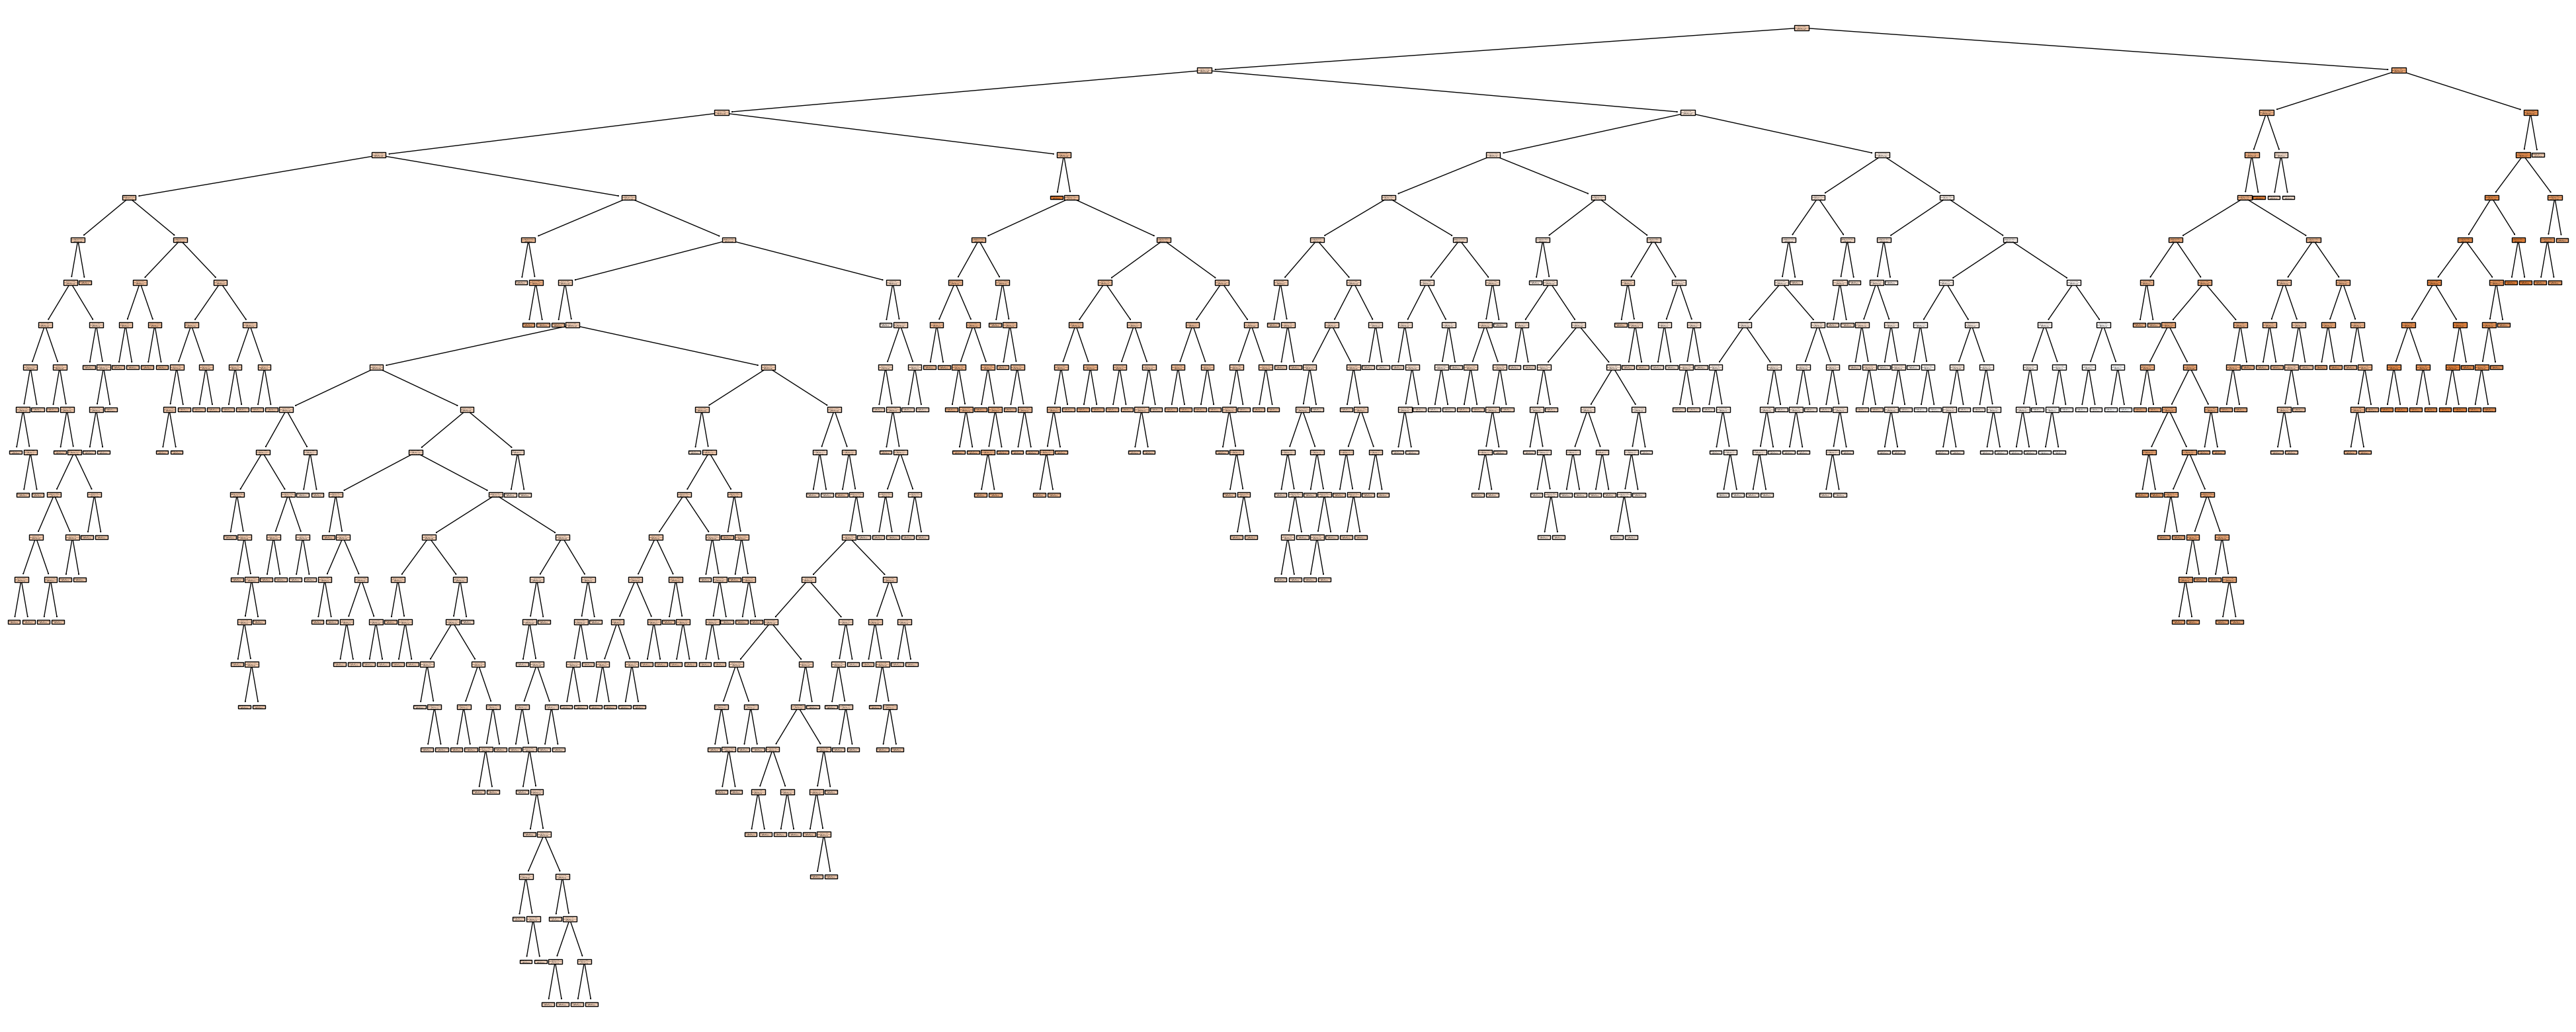

In [153]:
%time
arvore_final=DecisionTreeRegressor(random_state=100, ccp_alpha=0.00000000e+00)
arvore_final.fit(x_train,y_train)
plt.figure(figsize=(50,20))
plot_tree(arvore_final, filled=True)